# X-Ray Diffraction

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize as opt
import scipy.constants as const

title_size = 20
axis_size = 16
annotate_size = 12

In [5]:
density = 2.64 #g/cm^3
m_tot = 25.4 #u
m = 2*m_tot / const.N_A #g
Volume = m/density #cm^3
a = (Volume)**(1/3) #cm
d = a/((3)**(0.5)) #cm
print('d =',d,'cm',a)

d = 1.8320711407391087e-08 cm 3.173240298840807e-08


## Pre-lab Questions

1.a) Read labscript and relevant course material. Elements used from mathematical techniques are: scipy curve_fit and chi squared test.
<br>
<br>

1.b) From the equation $m\lambda = 2d\sin\theta$ from this for a higher wavelength the angle of diffraction will be greater than for a lower wavelength. As the energy of the K-alpha is lower as it comes from the n = 2 to the n = 1 shell, the wavelength will be higher and the angle of diffraction will be greater then that of the K-beta which comes from the n = 3 to the n = 1 shell.
Therefore the K-beta peak will be observed first and the K-alpha peak will be observed second.
<br>
<br>

1.c) Calculate the Interatomic spacing of a LiF cubic crystal using $d = \frac{a}{\sqrt{3}}$ where a is the lattice constant. First calculate the lattice constant from the mass and the density of the crystal. 

<br>
<br>
$\rho = 2.64 g/cm^3$
<br>
<br>

$m_{tot} = 25.94 u$
<br>
<br>
$$m_{tot} = \frac{2*25.94}{6.022\times 10^{23}} = 8.436\times 10^{-23} g$$
<br>
<br>
$$Volume = \frac{m_{tot}}{\rho} = \frac{8.436\times 10^{-23}}{2.64} = 3.195\times 10^{-23} cm^3$$
<br>
<br>
$$a = \sqrt[3]{Volume} = \sqrt[3]{3.195\times 10^{-23}} = 3.173\times 10^{-8} cm$$
<br>
<br>
$$d = \frac{a}{\sqrt{3}} = \frac{3.173\times 10^{-8}}{\sqrt{3}} = 1.832\times 10^{-8} cm$$

## Aims

The aims of this experiemnt are to verify the wavelengths of the K-alpha and K-beta lines of X-rays using a crystal (LiF) of known interatomic spacing and then using the same method to determine the interatomic spacing of 2 crystals (NaCl and KCl).

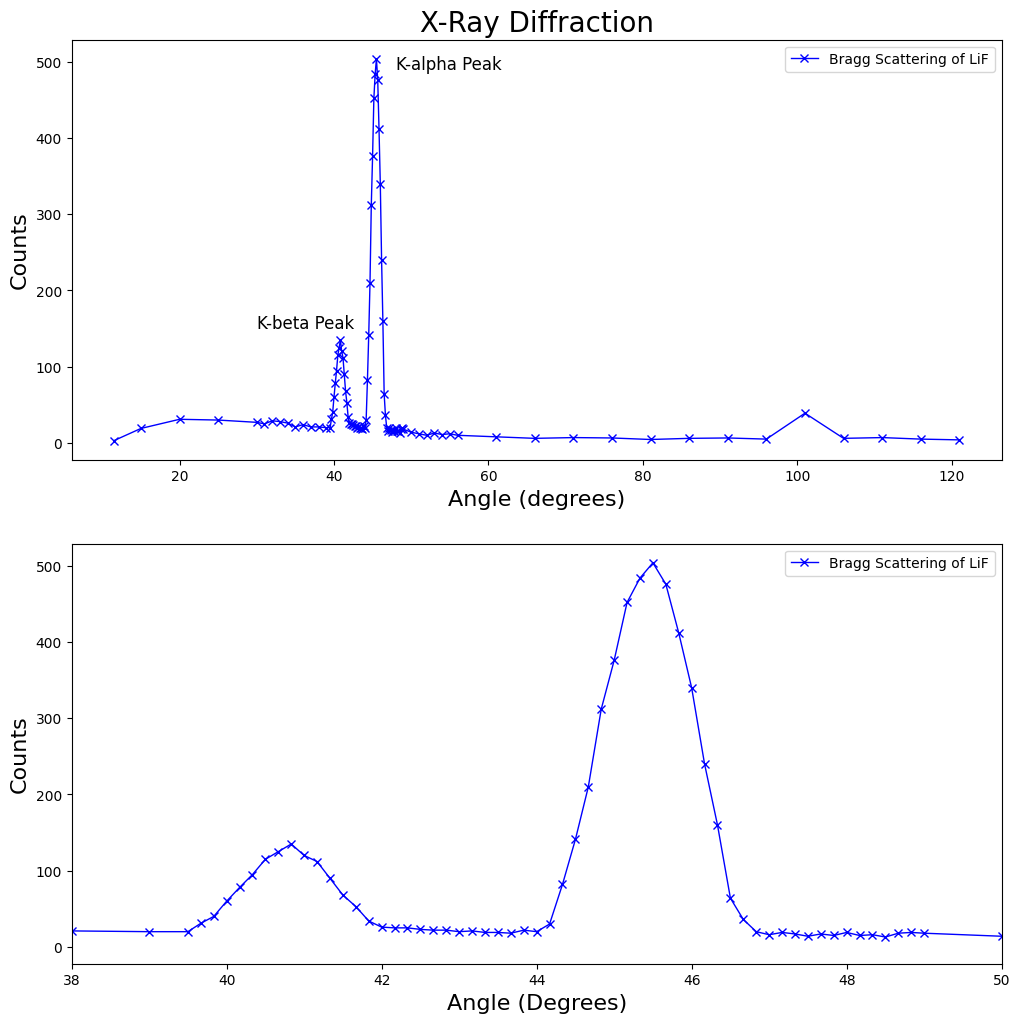

In [6]:
angle  = np.loadtxt('xray_data_LiF.txt', usecols=0, delimiter=',')
counts = np.loadtxt('xray_data_LiF.txt', usecols=1, delimiter=',')
rad = angle * np.pi / 180

sorted_angle = np.sort(angle)
sorted_counts = ([counts[np.where(angle == i)] for i in sorted_angle])
flat_counts = [item for sublist in sorted_counts for item in sublist]

plt.figure(figsize = (12,12))
plt.subplot(2,1,1)
plt.plot(sorted_angle, sorted_counts, marker = 'x',color = 'blue', linewidth = 1,label='Bragg Scattering of LiF')
plt.xlabel('Angle (degrees)', fontsize=axis_size)
plt.ylabel('Counts', fontsize=axis_size)
plt.title('X-Ray Diffraction', fontsize=title_size)
plt.annotate('K-beta Peak', xy=(30, 150), fontsize=annotate_size)
plt.annotate('K-alpha Peak', xy=(48, 490), fontsize=annotate_size)
plt.legend()

plt.subplot(2,1,2)
plt.plot(sorted_angle, sorted_counts, marker = 'x',color = 'blue', linewidth = 1,label='Bragg Scattering of LiF')
plt.xlabel('Angle (Degrees)', fontsize=axis_size)
plt.xlim(38,50)
plt.ylabel('Counts', fontsize=axis_size)
plt.legend()

plt.show()


In [7]:
def FWHM(x,y):
    half_max = np.max(y)/2 
    x1 = x[np.where(y > half_max)]
    x2 = x[np.where(y > half_max)]
    return x1[-1] - x2[0]

peaks_indexes,peaks = sp.signal.find_peaks(flat_counts, height=100, distance=10)
def wavelength(d, theta,m):
    return (2*d*np.sin(theta))/m
def energy(wavelength):
    return const.h*const.c/wavelength
m=1
angle = (sorted_angle[peaks_indexes])

print(f'The peaks for the K-alpha and K-beta lines are at {angle[0]} and {angle[1]} degrees respectively')
print(f'The Wavelength of the K-alpha line is {wavelength(d,angle[0],m):2e}, and K-beta line is {wavelength(d,angle[1],m):2e}')
print(f'The Energy of the K-alpha line is {energy(wavelength(d,angle[0],m)):2e}, and K-beta line is {energy(wavelength(d,angle[1],m)):2e}')





The peaks for the K-alpha and K-beta lines are at 40.833333 and 45.5 degrees respectively
The Wavelength of the K-alpha line is 2.700997e-10, and K-beta line is 3.658979e-08
The Energy of the K-alpha line is 7.354492e-16, and K-beta line is 5.428962e-18


# KCl

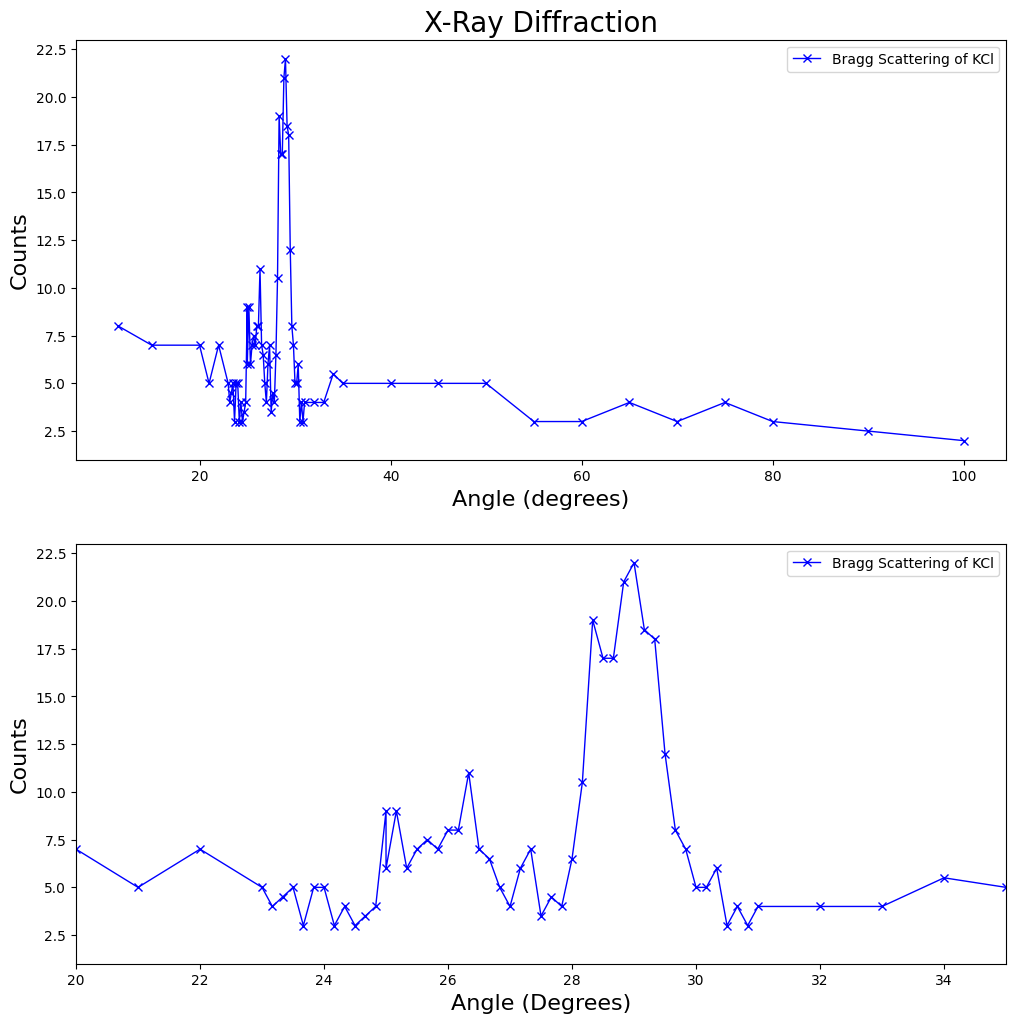

In [8]:
angle  = np.loadtxt('xray_data_KCl.txt', usecols=0, delimiter=',')
counts = np.loadtxt('xray_data_KCl.txt', usecols=1, delimiter=',')
rad = angle * np.pi / 180

sorted_angle = np.sort(angle)
sorted_counts = ([counts[np.where(angle == i)] for i in sorted_angle])
flat_counts = [item for sublist in sorted_counts for item in sublist]
flat_counts = (flat_counts[:70])

plt.figure(figsize = (12,12))
plt.subplot(2,1,1)
plt.plot(sorted_angle, flat_counts, marker = 'x',color = 'blue', linewidth = 1,label='Bragg Scattering of KCl')
plt.xlabel('Angle (degrees)', fontsize=axis_size)
plt.ylabel('Counts', fontsize=axis_size)
plt.title('X-Ray Diffraction', fontsize=title_size)
plt.legend()

plt.subplot(2,1,2)
plt.plot(sorted_angle, flat_counts, marker = 'x',color = 'blue', linewidth = 1,label='Bragg Scattering of KCl')
plt.xlabel('Angle (Degrees)', fontsize=axis_size)
plt.xlim(20,35)
plt.ylabel('Counts', fontsize=axis_size)
plt.legend()

plt.show()

# NaCl

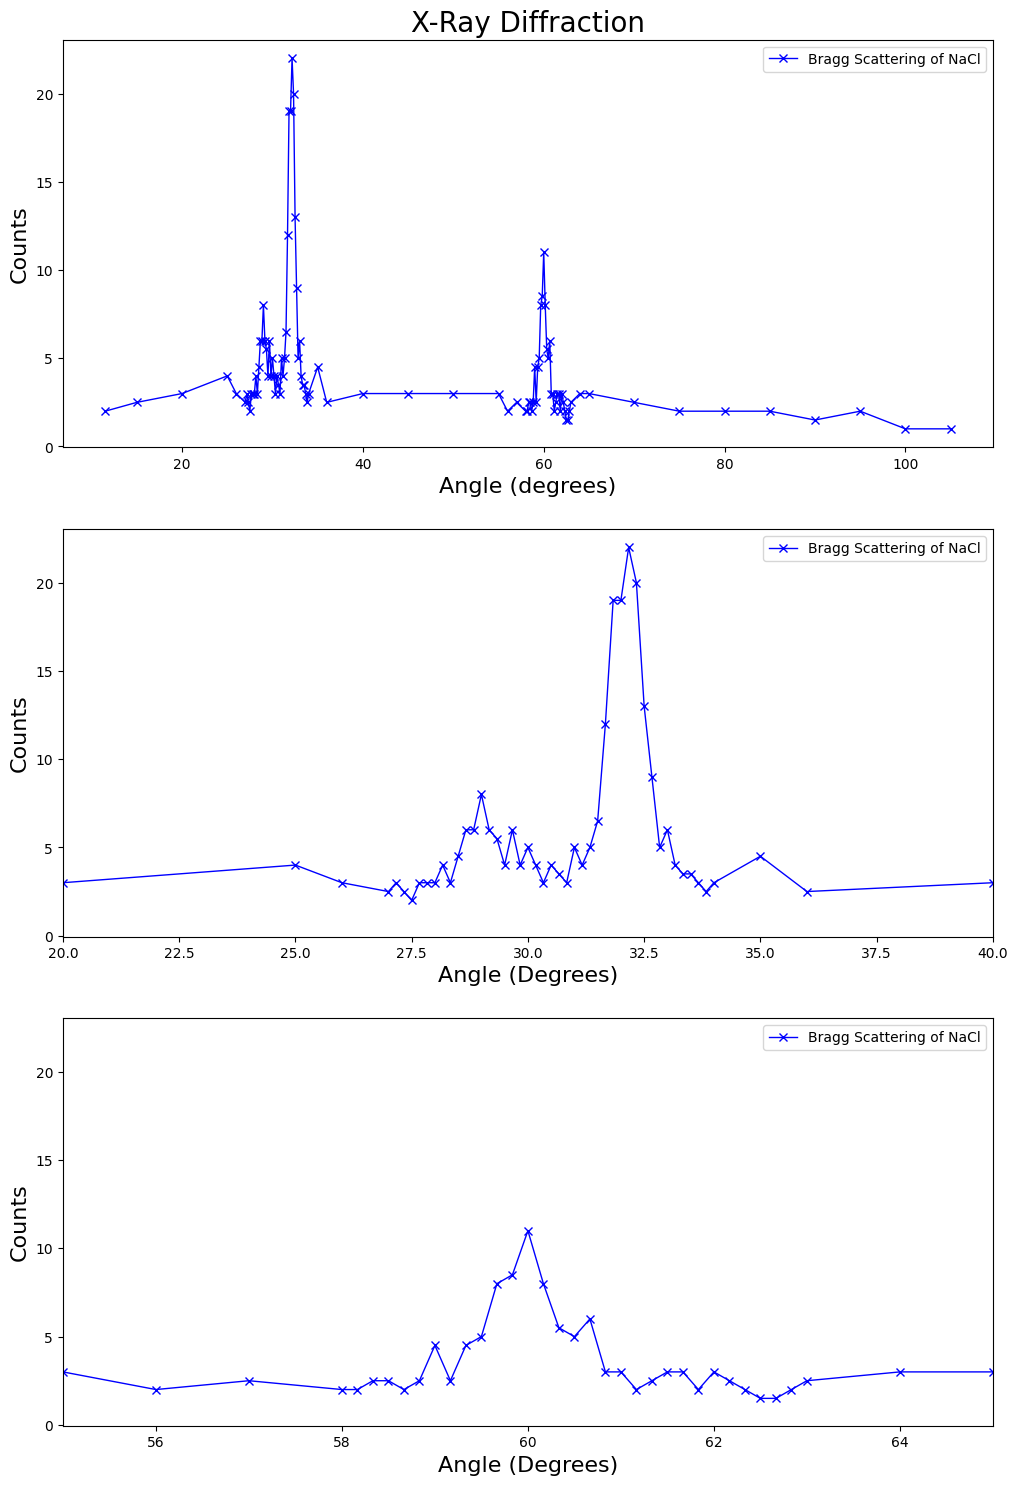

In [9]:
angle  = np.loadtxt('xray_data_NaCl.txt', usecols=0, delimiter=',')
counts = np.loadtxt('xray_data_NaCl.txt', usecols=1, delimiter=',')
rad = angle * np.pi / 180

sorted_angle = np.sort(angle)
sorted_counts = ([counts[np.where(angle == i)] for i in sorted_angle])
flat_counts = [item for sublist in sorted_counts for item in sublist]
#flat_counts = (flat_counts[:70])

plt.figure(figsize = (12,18))
plt.subplot(3,1,1)
plt.plot(sorted_angle, flat_counts, marker = 'x',color = 'blue', linewidth = 1,label='Bragg Scattering of NaCl')
plt.xlabel('Angle (degrees)', fontsize=axis_size)
plt.ylabel('Counts', fontsize=axis_size)
plt.title('X-Ray Diffraction', fontsize=title_size)
plt.legend()

plt.subplot(3,1,2)
plt.plot(sorted_angle, flat_counts, marker = 'x',color = 'blue', linewidth = 1,label='Bragg Scattering of NaCl')
plt.xlabel('Angle (Degrees)', fontsize=axis_size)
plt.xlim(20,40)
plt.ylabel('Counts', fontsize=axis_size)
plt.legend()

plt.subplot(3,1,3)
plt.plot(sorted_angle, flat_counts, marker = 'x',color = 'blue', linewidth = 1,label='Bragg Scattering of NaCl')
plt.xlabel('Angle (Degrees)', fontsize=axis_size)
plt.xlim(55,65)
plt.ylabel('Counts', fontsize=axis_size)
plt.legend()

plt.show()